In [1]:
# Import
import matplotlib.pyplot as plt
from lab2_functions import euler,beuler,leapfrog
import numpy as np

In [2]:
# Define
theFuncs={'euler':euler,'beuler':beuler,'leapfrog':leapfrog}


In [3]:
def plot_stability(input_list,input_type,funChoice,tend=10.):
    
    Ta=20.
    To=30.
    theLambda=-8.
    ymax = 30
    
    plt.close('all')
    plt.figure(figsize=(12, 5))
    plt.clf()

    for i in input_list:
        deltat = tend / i if input_type == 'npts' else i
        npts = i if input_type == 'npts' else int(tend / i)
        approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
        maxTemp = max(approxTemp)
        ymax = min(maxTemp,50) if maxTemp > ymax else ymax
        plt.plot(approxTime,approxTemp,label=f"deltat = {deltat:5.2g}")

    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.plot(exactTime,exactTemp,'r+',label="exact")
    theAx=plt.gca()
    theAx.set_xlim([0,tend])
    theAx.set_ylim([15,ymax])
    title = f"Visualizing stability of the {funChoice} scheme\n"
    title += f"For lambda={theLambda}, forward euler stability condition is deltat <{-2./theLambda:5.2g}"
    theAx.set_title(title)
    theAx.legend(loc='best')
    plt.show()
    

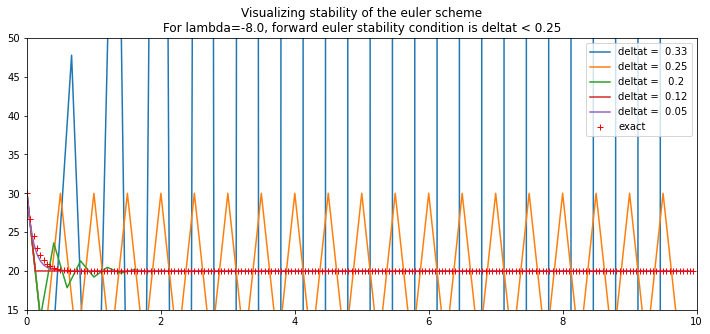


Comments: we can "see" the -2/lambda condition with stable oscillations for deltat=0.25.
Diverging instabilities appear as soon as deltat<0.25, here shown for deltat=0.33




In [4]:
# Question 1
tend=10.
funChoice='euler'
input_list = [30,40,50,80,200]
input_type='npts'

plot_stability(input_list,input_type,funChoice,tend)

# Comments
print(
"""
Comments: we can "see" the -2/lambda condition with stable oscillations for deltat=0.25.
Diverging instabilities appear as soon as deltat<0.25, here shown for deltat=0.33

"""
)


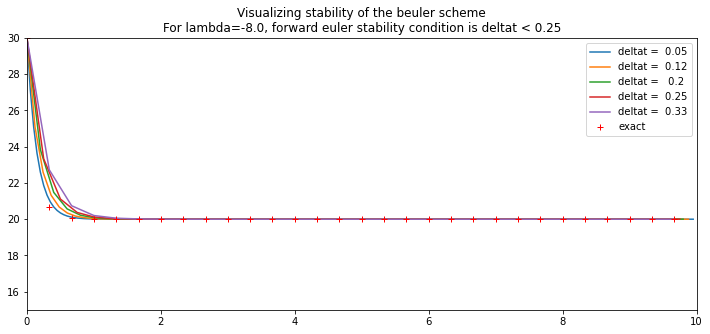

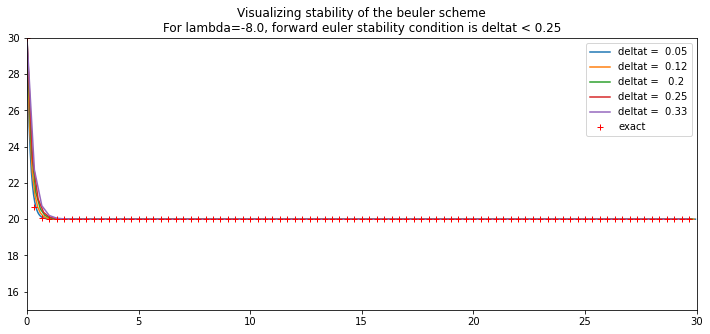

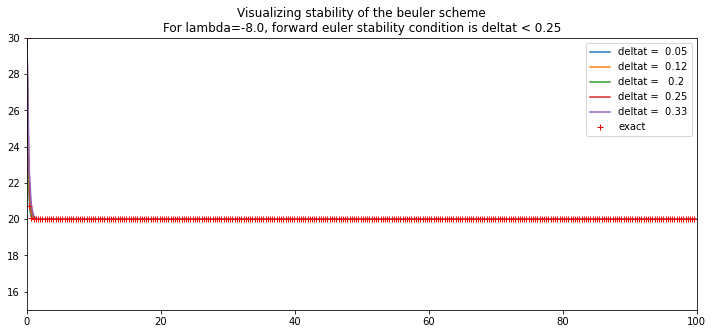


The backward euler scheme does not show instabilities (for lambda=-8), even after 100s.




In [5]:
# Question 2

# Backward Euler scheme
funChoice='beuler'
input_list = [0.05,0.12,0.2,0.25,0.33]
input_type='deltat'

for tend in [10,30,100]:
    plot_stability(input_list,input_type,funChoice,tend)


# Comments
print(
"""
The backward euler scheme does not show instabilities (for lambda=-8), even after 100s.

"""
)


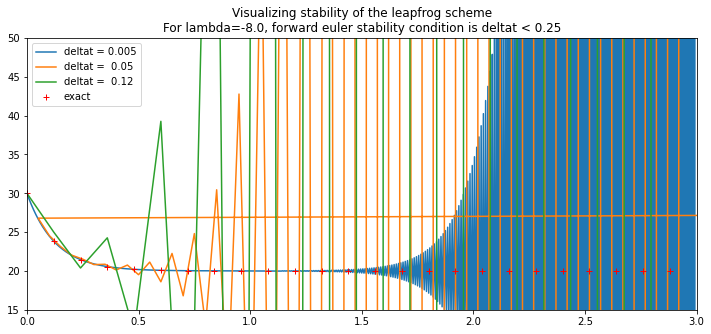


The leapfrog scheme appears to be systematically unstable, with instabilities growing 
beyond the signal (To) after only 1s, for detlat=0.05s




In [6]:
# Leapfrog scheme
tend=3.
funChoice='leapfrog'
input_list = [0.005,0.05,0.12]
input_type='deltat'
plot_stability(input_list,input_type,funChoice,tend)


# Comments
print(
"""
The leapfrog scheme appears to be systematically unstable, with instabilities growing 
beyond the signal (To) after only 1s, for detlat=0.05s

"""
)
